In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

/Applications/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

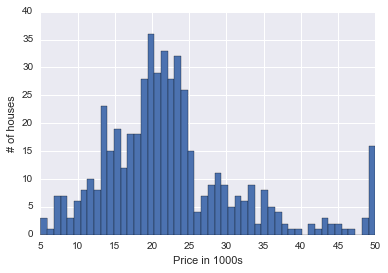

In [7]:
plt.hist(boston.target, bins=50)
plt.xlabel('Price in 1000s')
plt.ylabel('# of houses')

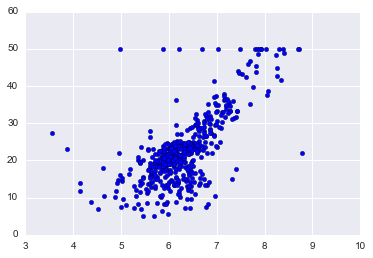

In [8]:
plt.scatter(boston.data[:,5],boston.target)

In [9]:
boston_df = pd.DataFrame(boston.data)

boston_df.columns = boston.feature_names

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston_df['Price'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


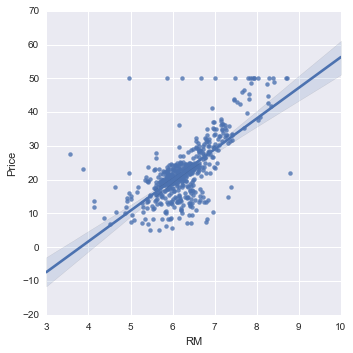

In [12]:
sns.lmplot('RM','Price',data=boston_df)

In [13]:
print len(boston_df)

506


In [14]:
### Least Squares Method

In [15]:
X = boston_df['RM']

In [16]:
X = np.vstack(X)
X.shape

(506, 1)

In [17]:
Y = boston_df['Price']


In [18]:
X = np.array ([[value,1] for value in X])

In [19]:
m,b = np.linalg.lstsq(X,Y)[0]

In [20]:
m,b

(9.1021089811803115, -34.670620776438561)

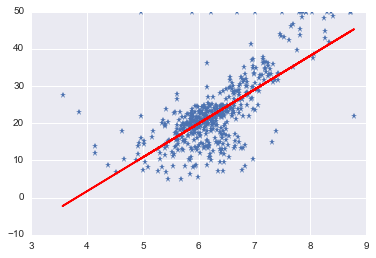

In [21]:
plt.plot(boston_df['RM'],boston_df['Price'],'*')

x = boston_df['RM']
y = m*x + b

plt.plot(x,y,'r')

In [22]:
#Finding the error

In [23]:
result = np.linalg.lstsq(X,Y)
error_total = result[1]

rmse = np.sqrt(error_total/len(X))

print 'root mean square error ', rmse

root mean square error  [ 6.60307139]


In [24]:
# Multivariate Linear Regression
# Using sklearn library to compute fit and prediction model

In [25]:
import sklearn
from sklearn.linear_model import LinearRegression

In [26]:
lreg = LinearRegression()

In [27]:
X_multi = boston_df.drop('Price',1)

Y_target = boston_df['Price']

In [28]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
print 'Estimated intercept coefficient %.2f' % lreg.intercept_

print 'Number of coefficients %d' % len(lreg.coef_)

Estimated intercept coefficient 36.49
Number of coefficients 13


In [30]:
coeff_df = DataFrame(boston_df.columns)

coeff_df.columns = ['Features']

coeff_df['Coefficient Estimates'] = Series(lreg.coef_)

In [31]:
coeff_df

,Features,Coefficient Estimates
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [32]:
#Training and validation

In [33]:
X_train,X_test,Y_train,Y_test = sklearn.cross_validation.train_test_split(X_multi,boston_df['Price'])

In [34]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [35]:
lreg = LinearRegression()

lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
print 'Estimated intercept coefficient %.2f' % lreg.intercept_

print 'Number of coefficients %d' % len(lreg.coef_)

Estimated intercept coefficient 42.30
Number of coefficients 13


In [37]:
coeff_df_train = DataFrame(boston_df.columns)

coeff_df_train.columns = ['Features']

coeff_df_train['Coefficient Estimates'] = Series(lreg.coef_)

In [38]:
predict_train = lreg.predict(X_train)

predict_test = lreg.predict(X_test)

In [39]:
t_df = DataFrame(X_train)
t_df['originalPrice'] = Y_train
t_df['NewPrice'] = predict_train
t_df['Residual'] = Y_train - predict_train

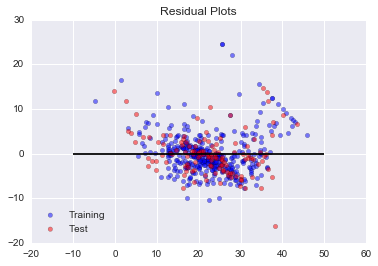

In [43]:
# Scatter plot the training data
train = plt.scatter(predict_train,(Y_train-predict_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(predict_test,(Y_test-predict_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')